<a href="https://colab.research.google.com/github/hygoni/Introduction-to-Machine-Learning-with-Python/blob/master/Chapter2.%20Supervised%20Learning/Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
from random import randint
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], \
                                        random_state = randint(1, 1000), stratify = cancer['target'], test_size = 0.3)

### 모델 학습

In [12]:
best_tree = 0
best_depth = 0
max_test_score = 0
for max_depth in range(1, 100):
    tree = DecisionTreeClassifier(max_depth = max_depth).fit(X_train, y_train)
    test = tree.score(X_test, y_test)
    train = tree.score(X_train, y_train)
    if test > max_test_score:
        max_test_score = test
        best_depth = max_depth
        best_tree = tree

tree = best_tree
print('Decision Tree')
print('Train Accuracy')
print(tree.score(X_train, y_train))
print('Test Accuracy')
print(tree.score(X_test, y_test))
print('Best max_depth')
print(best_depth)

Decision Tree
Train Accuracy
0.9899497487437185
Test Accuracy
0.9298245614035088
Best max_depth
5


### 시각화

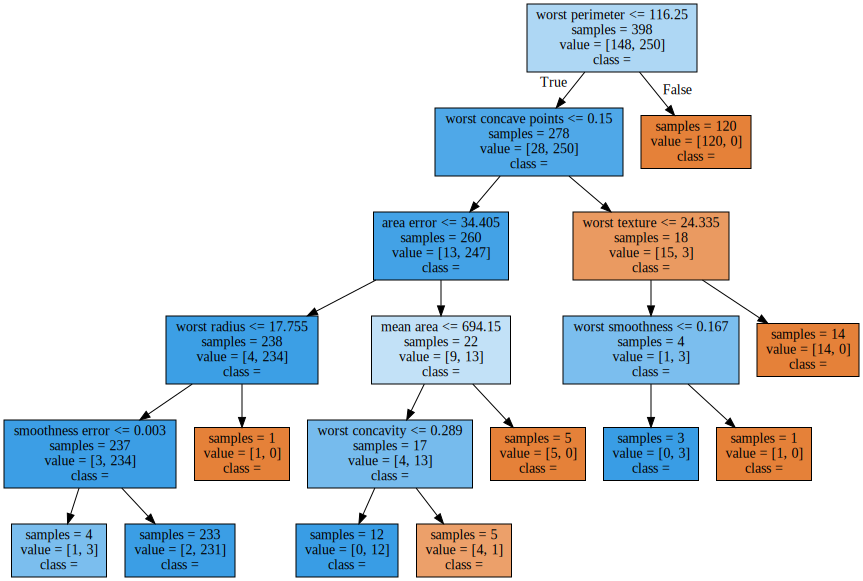

In [14]:
# 결정트리 시각화

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file = 'tree.dot', class_names = ['악성', '양성'],
                feature_names = cancer.feature_names, impurity=False, filled=True)

with open('tree.dot') as f:
    graph = f.read()
display(graphviz.Source(graph))

([<matplotlib.axis.YTick at 0x7f139d12c160>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
 

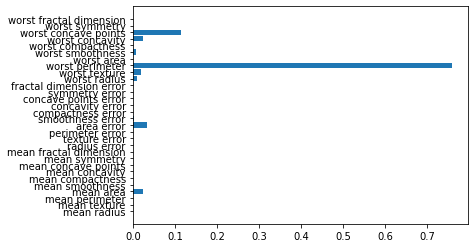

In [19]:
# 파라미터 중요도 시각화
import matplotlib.pyplot as plt
import numpy as np

n_features = len(cancer.feature_names)
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)